In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [95]:
agri = pd.read_csv('agriculture.csv')

## Pre_processing

In [96]:
agri.shape

(420, 13)

In [97]:
agri.head()

,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,SNEA.SG01NAC16P10A11,2007.03,526,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN
1,SNEA.SG01NAC16P10A11,2008.03,482,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN
2,SNEA.SG01NAC16P10A11,2009.03,404,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN
3,SNEA.SG01NAC16P10A11,2010.03,450,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN
4,SNEA.SG01NAC16P10A11,2011.03,563,FINAL,Dollar,6,National Accounts - SNA 2008 - SNE,"Series, GDP(P), Nominal, Actual, Agricultural ...",Output,Wool,NaN,NaN,NaN


In [98]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  420 non-null    object 
 1   Period            420 non-null    float64
 2   Data_value        420 non-null    int64  
 3   STATUS            420 non-null    object 
 4   UNITS             420 non-null    object 
 5   MAGNTUDE          420 non-null    int64  
 6   Subject           420 non-null    object 
 7   Group             420 non-null    object 
 8   Series_title_1    420 non-null    object 
 9   Series_title_2    420 non-null    object 
 10  Series_title_3    0 non-null      float64
 11  Series_title_4    0 non-null      float64
 12  Series_title_5    0 non-null      float64
dtypes: float64(4), int64(2), object(7)
memory usage: 42.8+ KB


In [99]:
agri.describe() 

,Period,Data_value,MAGNTUDE,Series_title_3,Series_title_4,Series_title_5
count,420.000000,420.000000,420.0,0.0,0.0,0.0
mean,2013.530000,2376.026190,6.0,NaN,NaN,NaN
std,4.035936,4840.409542,0.0,NaN,NaN,NaN
min,2007.030000,-244.000000,6.0,NaN,NaN,NaN
25%,2010.030000,221.000000,6.0,NaN,NaN,NaN
50%,2013.530000,715.500000,6.0,NaN,NaN,NaN
75%,2017.030000,2108.250000,6.0,NaN,NaN,NaN
max,2020.030000,30370.000000,6.0,NaN,NaN,NaN


In [100]:
agri.isnull().count().sum()

5460

In [101]:
agri.isna().sum()

Series_reference      0
Period                0
Data_value            0
STATUS                0
UNITS                 0
MAGNTUDE              0
Subject               0
Group                 0
Series_title_1        0
Series_title_2        0
Series_title_3      420
Series_title_4      420
Series_title_5      420
dtype: int64

In [102]:
agri.duplicated().sum()

0

## EDA

### Univariant analysis

#### categorical data

<Axes: xlabel='count', ylabel='UNITS'>

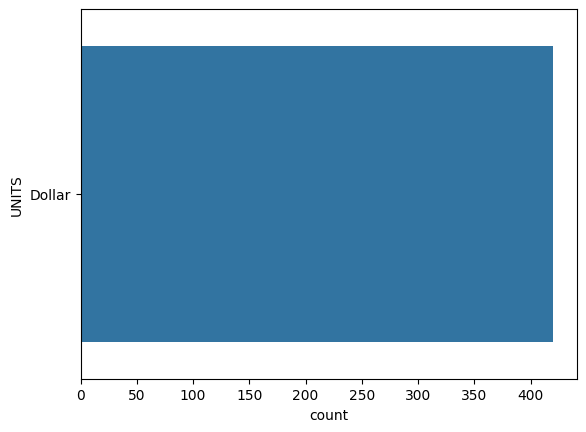

In [103]:
sns.countplot(agri['UNITS']) # so UNITS column is constant

<Axes: xlabel='count', ylabel='STATUS'>

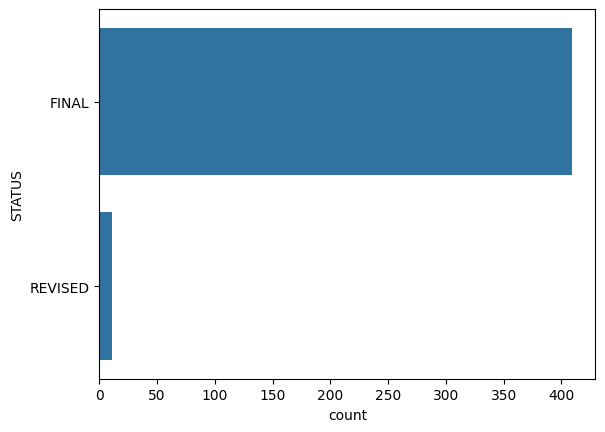

In [104]:
sns.countplot(agri['STATUS']) # slightly variation in STATUS. contains two classes(binary classified)

<Axes: xlabel='count', ylabel='Series_reference'>

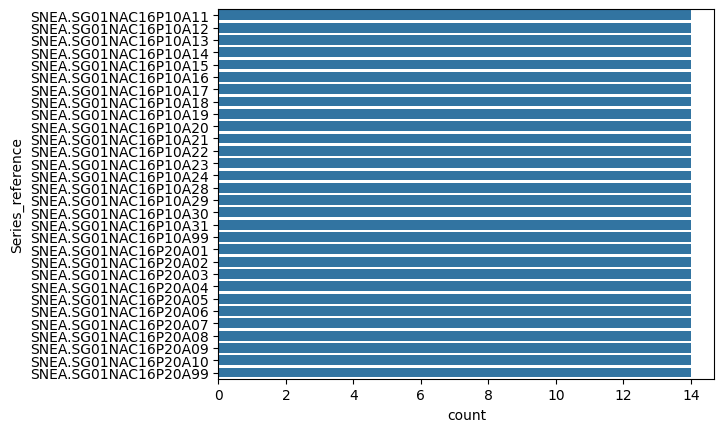

In [105]:
sns.countplot(agri['Series_reference'])

<Axes: xlabel='count', ylabel='Subject'>

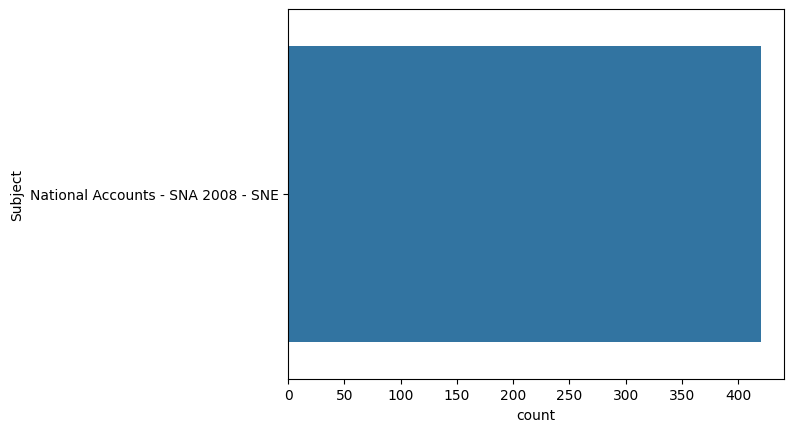

In [106]:
sns.countplot(agri['Subject']) # single class i:e; National Accounts

<Axes: xlabel='count', ylabel='Group'>

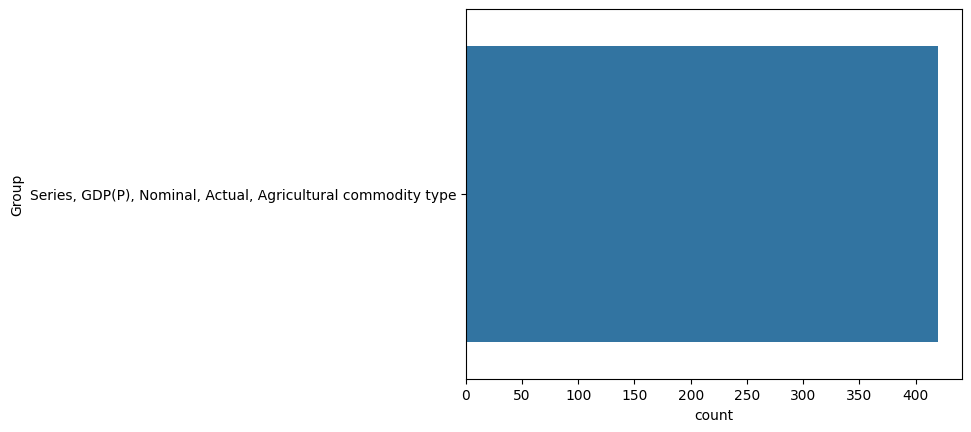

In [107]:
sns.countplot(agri['Group']) #single class no variation

<Axes: xlabel='count', ylabel='Series_title_1'>

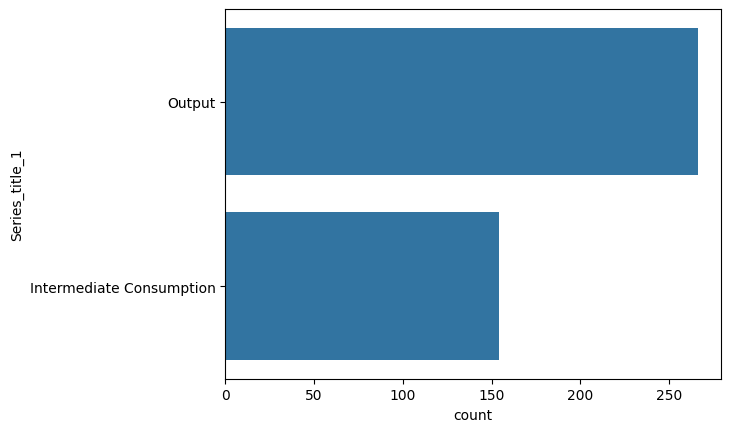

In [108]:
sns.countplot(agri['Series_title_1']) #binary classification

<Axes: xlabel='count', ylabel='Series_title_2'>

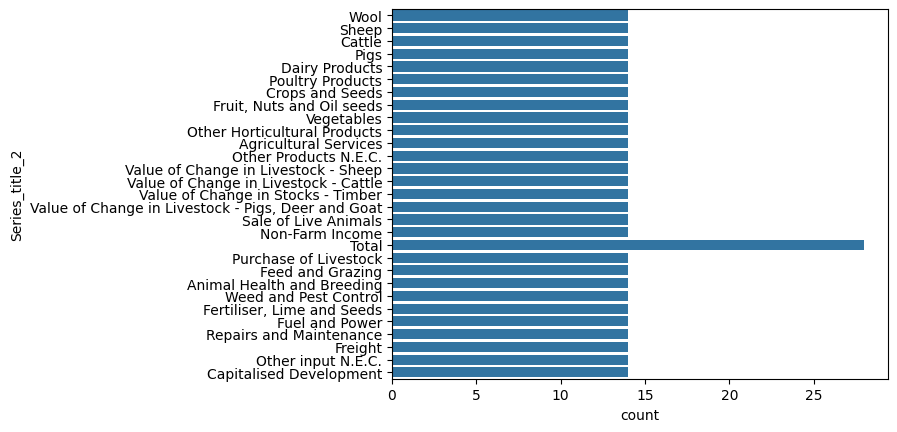

In [109]:
sns.countplot(agri['Series_title_2'])

<Axes: ylabel='count'>

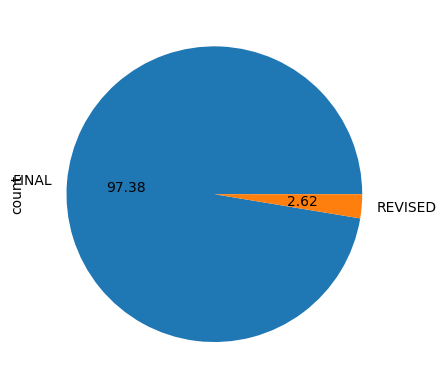

In [110]:
agri['STATUS'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

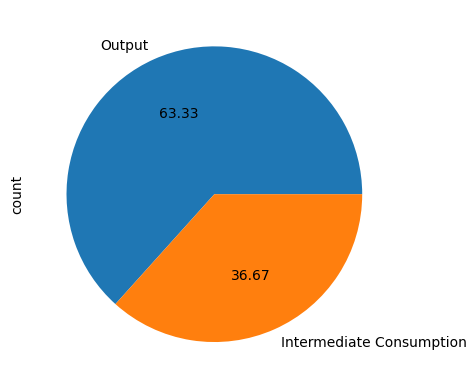

In [111]:
agri['Series_title_1'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

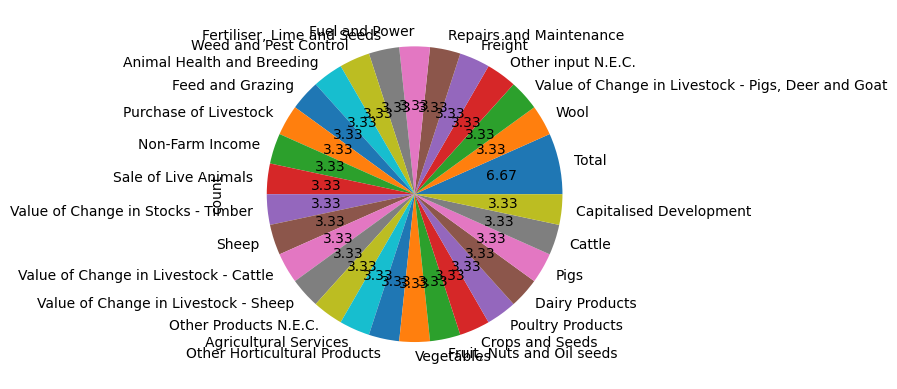

In [112]:
agri['Series_title_2'].value_counts().plot(kind='pie',autopct='%.2f')

#### Numerical data

(array([60., 30., 30., 60., 30., 30., 60., 30., 30., 60.]),
 array([2007.03, 2008.33, 2009.63, 2010.93, 2012.23, 2013.53, 2014.83,
        2016.13, 2017.43, 2018.73, 2020.03]),
 <BarContainer object of 10 artists>)

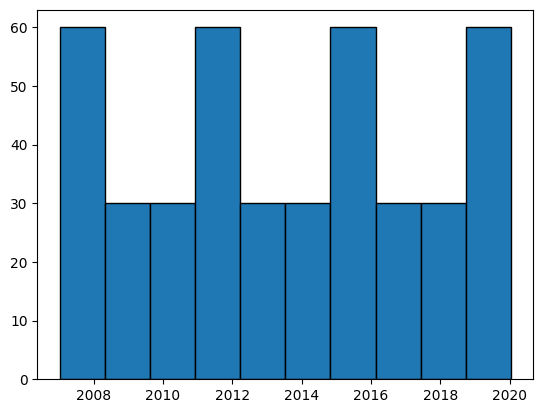

In [113]:
plt.hist(agri['Period'],bins=10,edgecolor='black')

{'whiskers': [<matplotlib.lines.Line2D at 0x27027b61a90>,
 'caps': [<matplotlib.lines.Line2D at 0x27027b632d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27027b60f90>],
 'medians': [<matplotlib.lines.Line2D at 0x27027b64890>],
 'fliers': [<matplotlib.lines.Line2D at 0x27027b65310>],
 'means': []}

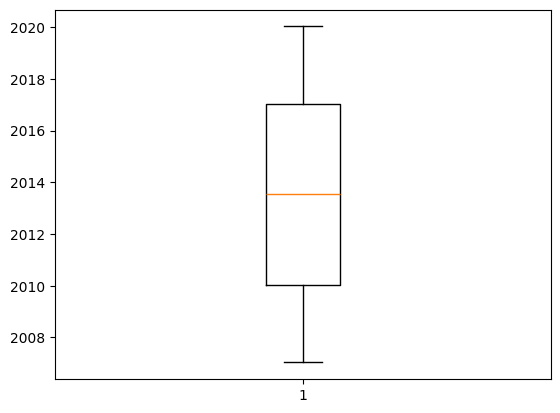

In [114]:
plt.boxplot(agri['Period'])

<Axes: ylabel='Density'>

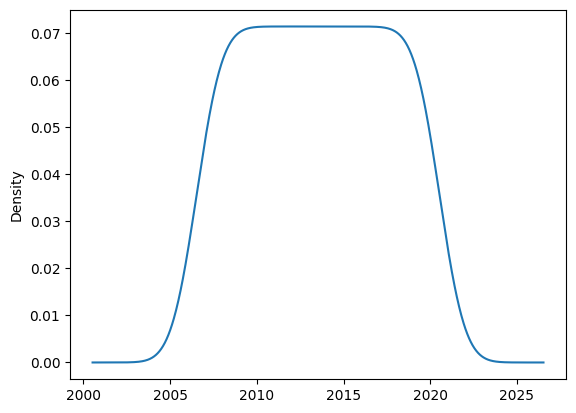

In [115]:
agri['Period'].plot(kind='density') # normal

(array([349.,  30.,   4.,  10.,  12.,   3.,   2.,   5.,   2.,   3.]),
 array([ -244. ,  2817.4,  5878.8,  8940.2, 12001.6, 15063. , 18124.4,
        21185.8, 24247.2, 27308.6, 30370. ]),
 <BarContainer object of 10 artists>)

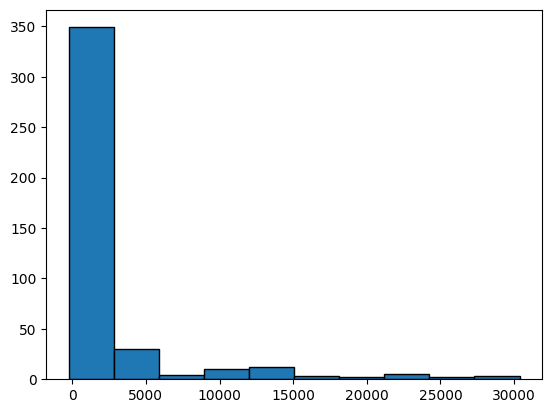

In [116]:
plt.hist(agri['Data_value'],bins=10,edgecolor='black')

<Axes: ylabel='Data_value'>

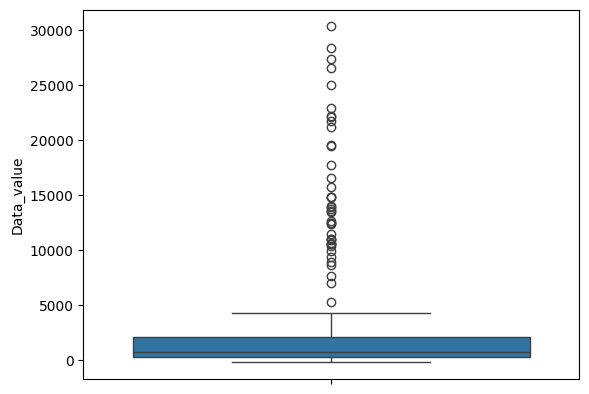

In [117]:
sns.boxplot(agri['Data_value']) # righly skweed data with a lot of outliers

<Axes: ylabel='Density'>

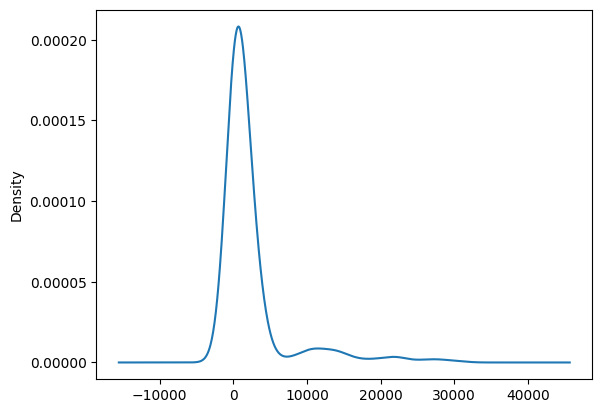

In [118]:
agri['Data_value'].plot(kind='density')

(array([  0.,   0., 420.,   0.,   0.]),
 array([5.5, 5.7, 5.9, 6.1, 6.3, 6.5]),
 <BarContainer object of 5 artists>)

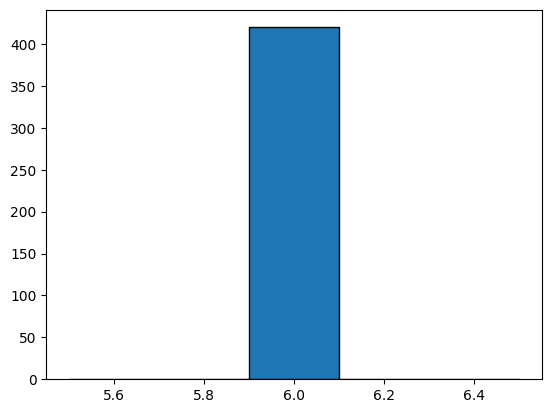

In [119]:
plt.hist(agri['MAGNTUDE'],bins=5,edgecolor='black') #constant

### bivariant

<Axes: ylabel='Data_value'>

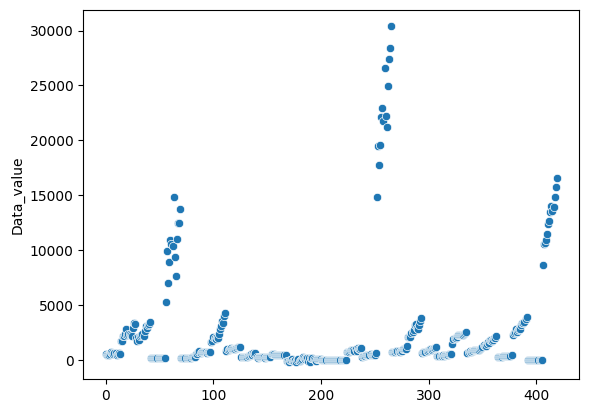

In [120]:
sns.scatterplot(agri['Data_value'])

## feature Engineering

In [121]:
agri = agri.drop(columns=['Series_reference','UNITS','Subject','Group','MAGNTUDE','Series_title_3','Series_title_4','Series_title_5'],axis=1) #because these columns are constant or nulls

In [122]:
agri.head()

,Period,Data_value,STATUS,Series_title_1,Series_title_2
0,2007.03,526,FINAL,Output,Wool
1,2008.03,482,FINAL,Output,Wool
2,2009.03,404,FINAL,Output,Wool
3,2010.03,450,FINAL,Output,Wool
4,2011.03,563,FINAL,Output,Wool


In [123]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
agri['Period'] = norm.fit_transform(agri['Period'].values.reshape(-1, 1))

In [124]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['FINAL','REVISED']])
agri['STATUS'] = oe.fit_transform(agri['STATUS'].values.reshape(-1,1))

In [125]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
agri['Series_title_1'] = lb.fit_transform(agri['Series_title_1'])

In [126]:
from sklearn.preprocessing import RobustScaler,Normalizer
rs = RobustScaler()
norm = Normalizer()
agri['Data_value'] = rs.fit_transform(agri['Data_value'].values.reshape(-1,1))
agri['Data_value'] = norm.fit_transform(agri['Data_value'].values.reshape(-1,1))

In [127]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False) 
agri['Series_title_2'] = onehot_encoder.fit_transform(agri[['Series_title_2']]) 

In [128]:
agri.head()

,Period,Data_value,STATUS,Series_title_1,Series_title_2
0,-1.612452,-1.0,0.0,1,0.0
1,-1.364382,-1.0,0.0,1,0.0
2,-1.116313,-1.0,0.0,1,0.0
3,-0.868243,-1.0,0.0,1,0.0
4,-0.620174,-1.0,0.0,1,0.0


## Model

In [136]:
Y = agri['Series_title_1']
X = agri.drop(['Series_title_1'],axis=1)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.4, random_state=1)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [153]:
y_pred = knn.predict(X_test)

## Score

In [154]:
from sklearn import metrics
print("kNN model accuracy:", metrics.accuracy_score(y_test,y_pred))

kNN model accuracy: 0.5297619047619048
